In [225]:
import pandas as pd

In [226]:
import numpy as np

In [227]:
import seaborn as se

In [228]:
import matplotlib.pyplot as pp 

In [229]:
sales=pd.read_csv('SalesData.csv')

In [230]:
sales.columns

Index(['AccountId', 'AccountName', 'Region', 'Division', 'City', 'State',
       'Tier', 'Month', 'Sales2015', 'Sales2016', 'Units2015', 'Units2016',
       'TargetAchevied2015', 'TargetAchevied2016'],
      dtype='object')

## 1. Compare Sales by region for 2016 with 2015 using bar chart

In [231]:
S1516=sales.groupby('Region')['Sales2015','Sales2016'].sum()
series1=sales.groupby('Region')['Sales2015'].sum().reset_index() 
series2=sales.groupby('Region')['Sales2016'].sum().reset_index()
daf=series1.merge(series2,how='left')
S2015=daf.Sales2015
S2016=daf.Sales2016
index=daf.Region

<ipython-input-231-dc9ace939fb3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  S1516=sales.groupby('Region')['Sales2015','Sales2016'].sum()


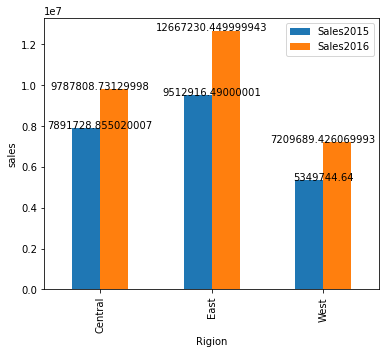

In [232]:
def add_value_label2015(x_list,y_list):
    for i in range(0, len(x_list)):
        pp.text(i,y_list[i],y_list[i], ha="center")

def add_value_label2016(x_list,y_list):
    for i in range(0, len(x_list)):
        pp.text(i,y_list[i],y_list[i], ha="center")

S1516.plot.bar(stacked=False,figsize=(6,5),width=0.5)
add_value_label2016(index,S2016)
add_value_label2015(index,S2015)
pp.ylabel('sales')
pp.xlabel('Rigion')
pp.show()

after Comparing Sales by region for 2016 with 2015 using bar chart, we say that 2016 sales is greater than 2015 by Region

## 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

In [233]:
Q2=sales.groupby('Region')['Sales2016'].sum()

([<matplotlib.patches.Wedge at 0x1a3010c08b0>,
 [Text(0.5601011754729365, 0.9467241801252543, 'Central'),
  Text(-1.0592537591761817, -0.2966167117192283, 'East'),
  Text(0.7946393928910669, -0.7606235831643119, 'West')])

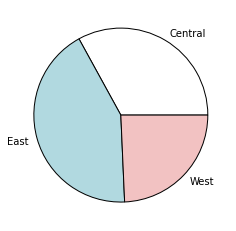

In [234]:
pp.pie(Q2,labels=["Central","East","West"],shadow = False, wedgeprops= {"edgecolor":"black"},colors=[ '#ffffff', '#b1d9e0','#f2c2c2'])

([<matplotlib.patches.Wedge at 0x1a302161dc0>,
 [Text(-0.2577580749025116, -1.3760671403759885, 'Central'),
  Text(1.1377215191778451, 0.8158368371185848, 'East'),
  Text(-1.2814650044207085, 0.5637796044954385, 'West')],
 [Text(-0.2209354927735814, -1.179486120322276, '33%'),
  Text(0.9751898735810101, 0.6992887175302155, '43%'),
  Text(-1.09839857521775, 0.48323966099609017, '24%')])

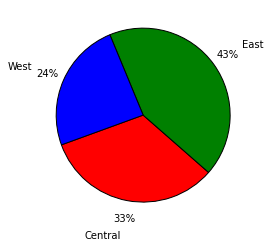

In [235]:
pp.pie(Q2,autopct='%1.0f%%',pctdistance=1.2, labeldistance=1.4,wedgeprops= {"edgecolor":"black"},labels=["Central","East","West"], shadow=False, startangle=200,colors=['r', 'g', 'b'])

([<matplotlib.patches.Wedge at 0x1a3021adb80>,
 [Text(0.7637743301903679, 1.2909875183526192, 'Central'),
  Text(-1.4444369443311567, -0.404477334162584, 'East'),
  Text(1.083599172124182, -1.0372139770422433, 'West')],
 [Text(0.6619377528316521, 1.1188558492389367, '33.0%'),
  Text(-1.2518453517536692, -0.35054702294090617, '42.7%'),
  Text(0.9391192825076243, -0.8989187801032776, '24.3%')])

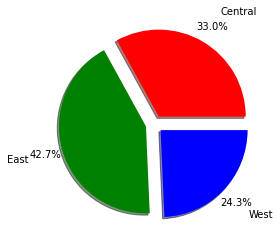

In [236]:
pp.pie(Q2,autopct='%1.1f%%',pctdistance=1.2, labeldistance=1.4,labels=["Central","East","West"], shadow = True,explode=(0.1,0.1,0.1),colors=['r', 'g', 'b'])

East region are the most (42.7%) contributing factor for sales in 2016 year

## 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

In [237]:
sales15_region_tiers=sales.groupby(['Region','Tier'])['Sales2015'].sum()
sales16_region_tiers=sales.groupby(['Region','Tier'])['Sales2016'].sum()

In [238]:
sales1516_region_tiers=pd.merge(sales15_region_tiers,sales16_region_tiers,on=['Region','Tier'])

In [239]:
sales1516_region_tiers

Sales2015     Sales2016
Region  Tier                            
Central High  4.798698e+06  6.026043e+06
        Low   9.434397e+05  1.132833e+06
        Med   2.068226e+06  2.632181e+06
        Out   8.136489e+04 -3.248530e+03
East    High  6.102946e+06  7.817151e+06
        Low   9.016658e+05  1.144930e+06
        Med   2.470998e+06  3.705150e+06
        Out   3.730655e+04  0.000000e+00
West    High  2.944789e+06  3.768038e+06
        Low   6.710644e+05  1.099502e+06
        Med   1.718476e+06  2.342149e+06
        Out   1.541508e+04  0.000000e+00

<AxesSubplot:xlabel='Region,Tier'>

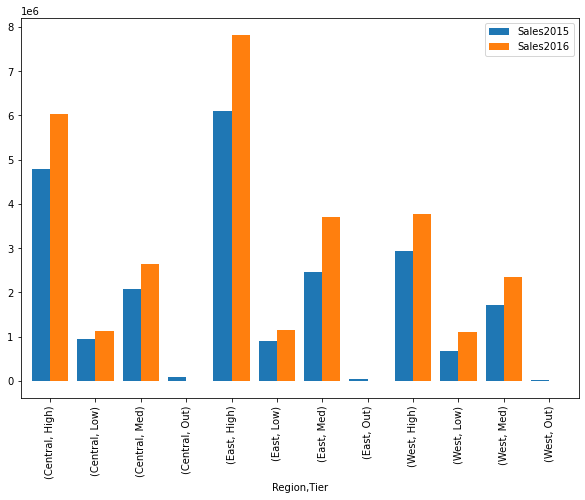

In [240]:
sales1516_region_tiers.plot(kind='bar',figsize=(10,7),width=0.8)

after Comparing sales of 2015 and 2016 with Region & Tiers wise we say that  "high Tier" ," East Rigion" have most sale
and "out Tier" ," West Rigion " have least sale  in 2015 and 2016 year 

## 4. In East region, which state registered a decline in 2016 as compared to 2015?

In [241]:
East_rigion=sales.loc[sales.Region=='East']

In [242]:
EastRigion_state=East_rigion.groupby('State')['Sales2015','Sales2016'].sum()

<ipython-input-242-95ad9fc7eef3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  EastRigion_state=East_rigion.groupby('State')['Sales2015','Sales2016'].sum()


In [243]:
EastRigion_state

,Sales2015,Sales2016
State,,
CT,197202.790,323502.31
DC,216723.950,257421.69
FL,1660162.000,2508232.28
GA,681546.460,946919.77
MA,419278.750,687096.45
MD,527309.060,750008.79
ME,77425.640,183673.05
NC,1292801.640,1610521.00
NH,136419.380,144717.51


Text(0.5, 0, 'State')

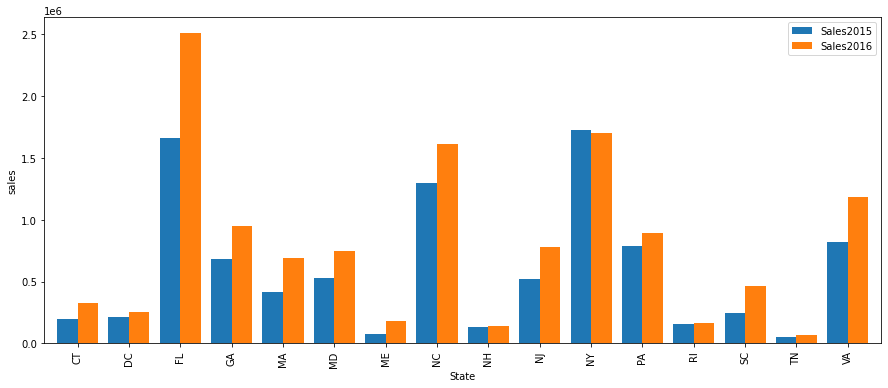

In [244]:
EastRigion_state.plot(kind='bar',figsize=(15,6),width=0.8)
pp.ylabel("sales")
pp.xlabel('State')

In [245]:
EastRigion_state[EastRigion_state.Sales2015>EastRigion_state.Sales2016]

,Sales2015,Sales2016
State,,
NY,1725415.065,1703135.8


East Rigion NewYark state has registered a decline in 2016 as compared to 2015

## 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

In [246]:
HighTier_unit=sales[sales.Tier=='High']

In [247]:
HighTier_Soldunit=HighTier_unit.groupby('Division')['Units2015','Units2016'].sum()

<ipython-input-247-818332fe0574>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  HighTier_Soldunit=HighTier_unit.groupby('Division')['Units2015','Units2016'].sum()


Text(0, 0.5, 'sold_unit')

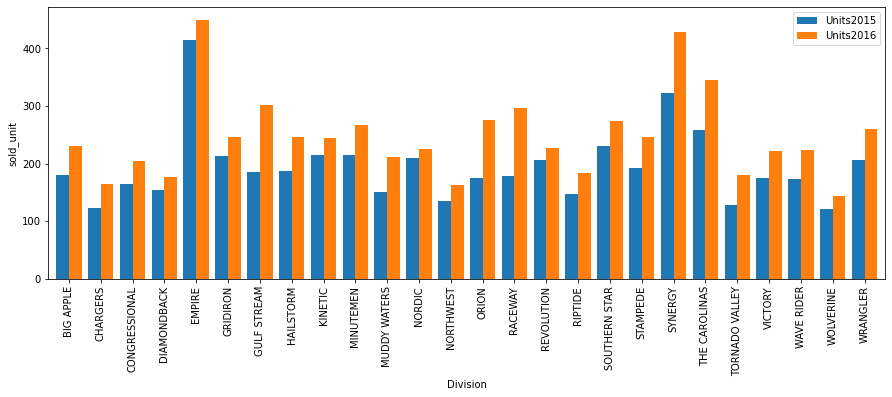

In [248]:
HighTier_Soldunit.plot(kind='bar',figsize=(15,5),width=0.8)
pp.ylabel('sold_unit')


In [249]:
HighTier_Soldunit[HighTier_Soldunit.Units2015>HighTier_Soldunit.Units2016]

,Units2015,Units2016
Division,,


In all the High tier,there is no Division which is  saw a decline in number of units sold in 2016 compared to 2015

## 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -

• Jan - Mar : Q1
• Apr - Jun : Q2
• Jul - Sep : Q3 
• Oct - Dec : Q4


In [250]:
Qtr=[]
for i in sales.Month:
    if i in['Jan','Feb','Mar']:
        Qtr.append('Q1')
    elif i in ['Apr','May','Jun']:
        Qtr.append('Q2')
    elif i in ['Jul','Aug','Sep']:
        Qtr.append('Q3')
    else:
            Qtr.append('Q4')

In [251]:
sales['Qtr']=Qtr

In [252]:
sales.groupby('Qtr').sum()

,AccountId,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
Qtr,,,,,,,
Q1,76109600,5.485800e+06,6.997953e+06,2049.1669,2631.1671,1014.15,1169.29
Q2,70861955,5.390862e+06,7.237361e+06,1997.0001,2742.8351,962.70,1129.25
Q3,65400127,6.164094e+06,7.861546e+06,2315.8362,2961.6678,1010.84,1179.03
Q4,73834612,5.713634e+06,7.567868e+06,2144.8356,2820.6678,971.28,1130.32


### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot

In [253]:
Qtr_sale=sales.groupby('Qtr')['Sales2015','Sales2016'].sum()

<ipython-input-253-9164e5851041>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Qtr_sale=sales.groupby('Qtr')['Sales2015','Sales2016'].sum()


Text(0, 0.5, 'sales')

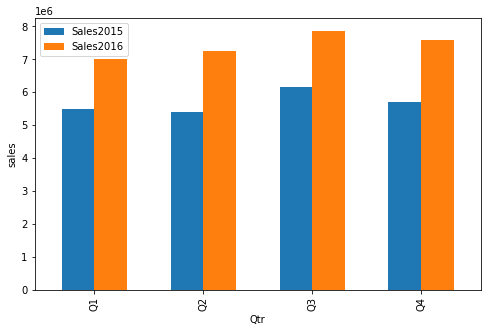

In [254]:
Qtr_sale.plot(kind='bar',figsize=(8,5),width=0.6)
pp.ylabel('sales')

### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a
pie chart.
(Draw 4 pie charts representing a Quarter for each Tier)

In [255]:
sales.groupby(['Qtr','Tier'])['Sales2016'].sum()

Qtr  Tier
Q1   High    3.867719e+06
     Low     9.488328e+05
     Med     2.181402e+06
     Out     0.000000e+00
Q2   High    4.130953e+06
     Low     8.905948e+05
     Med     2.215814e+06
     Out     0.000000e+00
Q3   High    4.872559e+06
     Low     7.951777e+05
     Med     2.197058e+06
     Out    -3.248530e+03
Q4   High    4.740002e+06
     Low     7.426594e+05
     Med     2.085207e+06
     Out     0.000000e+00
Name: Sales2016, dtype: float64

In [267]:
sal_piv=sales.pivot_table(index='Tier',columns='Qtr',values='Sales2016')

In [268]:
sal_piv[(sal_piv<0)]=0

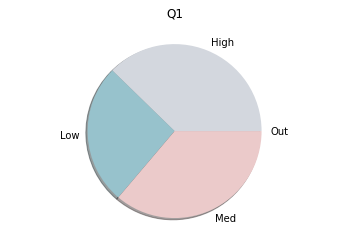

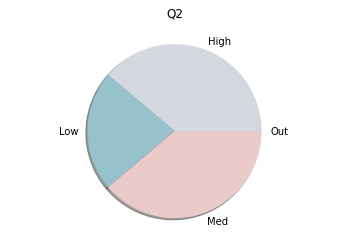

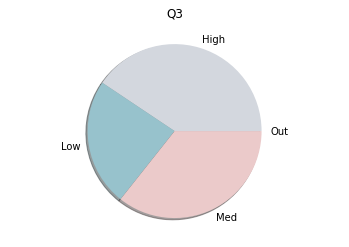

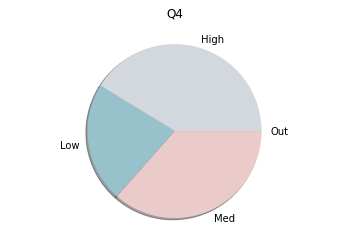

In [271]:

fig1,ax1 = pp.subplots()
ax1.axis('equal')
pp.pie(x=sal_piv.loc[:,"Q1"],labels=["High","Low","Med","Out"],colors=['#d3d7de', '#97c2cc', '#ebcaca'],shadow=True)
pp.title('Q1')



fig1,ax2 = pp.subplots()
ax2.axis('equal')
pp.pie(x=sal_piv.loc[:,"Q2"],labels=["High","Low","Med","Out"],colors=['#d3d7de', '#97c2cc', '#ebcaca'],shadow=True)
pp.title('Q2')


fig1,ax3 = pp.subplots()
ax3.axis('equal')
pp.pie(x=sal_piv.loc[:,"Q3"],labels=["High","Low","Med","Out"],colors=['#d3d7de', '#97c2cc', '#ebcaca'],shadow=True)
pp.title('Q3')


fig1,ax4 = pp.subplots()
ax4.axis('equal')
pp.pie(x=sal_piv.loc[:,"Q4"],labels=["High","Low","Med","Out"],colors=['#d3d7de', '#97c2cc', '#ebcaca'],shadow=True)
pp.title('Q4')



pp.show()


In [272]:
sal_piv

Qtr,Q1,Q2,Q3,Q4
Tier,,,,
High,7974.677515,8752.018136,9334.404693,9386.142545
Low,5516.469593,5031.608757,5446.422671,5052.104694
Med,7654.041681,8758.157542,8197.976091,8307.596804
Out,0.000000,0.000000,0.000000,0.000000
